In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%cd ..
%load_ext autoreload
%autoreload 2

C:\Users\Minjae\Desktop\EEG_Project


In [2]:
import os
import numpy as np
import csv
import pprint
import matplotlib
import matplotlib.pyplot as plt
import scienceplots

In [3]:
# Other settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # cleaner text

plt.style.use('default') 
# ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 
#  'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 
#  'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 
#  'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 
#  'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']

plt.rcParams['image.interpolation'] = 'bicubic'
plt.rcParams["font.family"] = 'Roboto Slab' # 'NanumGothic' # for Hangul in Windows
plt.style.use('classic') 
plt.style.use('default') 
plt.style.use('default') # default, ggplot, fivethirtyeight, bmh, dark_background, classic
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'Roboto Slab'})
plt.rcParams["savefig.dpi"] = 1200

In [4]:
performance = {}

task = 'abnormal'
with open(f"C:/Users/Minjae/Desktop/{task}.csv") as fp:
    rdr = csv.reader(fp)
    for i, line in enumerate(rdr):
        if i == 0:
            continue

        method = line[0]
        method = method.replace('(', '').replace(')', '')
        
        if method not in performance.keys():
            performance[method] = {}
            
        if line[3] != 'o':
            performance[method]['test_acc'] = float(line[5])
            # performance[method]['params'] = float(line[1])
            performance[method]['model_size'] = float(line[2])
            performance[method]['speed'] = float(line[4])
        else:
            performance[method]['tta_acc'] = float(line[5])
            performance[method]['tta_speed'] = float(line[4])
        
pprint.pprint(performance)

{'CEEDNet 1D-ResNeXt-50': {'model_size': 98.2,
                           'speed': 4754.64,
                           'test_acc': 72.37058824,
                           'tta_acc': 77.31764706,
                           'tta_speed': 800.49},
 'CEEDNet 1D-ResNet-18': {'model_size': 43.5,
                          'speed': 6369.27,
                          'test_acc': 73.60294118,
                          'tta_acc': 74.85294118,
                          'tta_speed': 844.65},
 'CEEDNet 1D-ResNet-50': {'model_size': 100.7,
                          'speed': 5009.97,
                          'test_acc': 74.11470588,
                          'tta_acc': 76.37058824,
                          'tta_speed': 837.66},
 'CEEDNet 1D-VGG-19': {'model_size': 77.2,
                       'speed': 7660.22,
                       'test_acc': 72.44852941,
                       'tta_acc': 74.27647059,
                       'tta_speed': 998.54},
 'CEEDNet 2D-ResNeXt-50': {'model_size': 99.1,
      

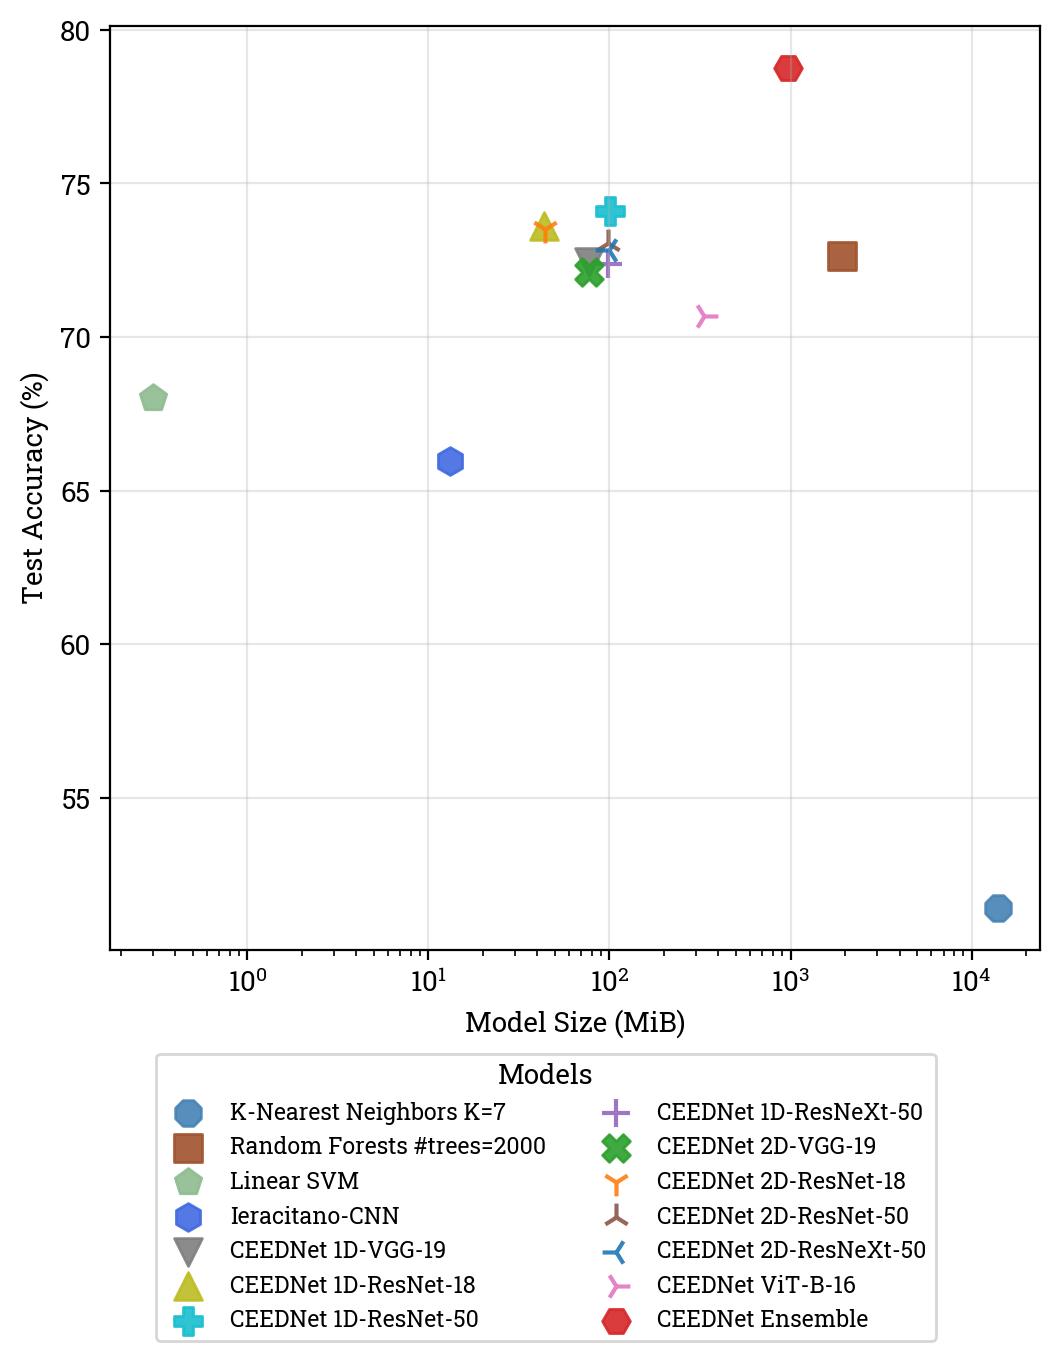

In [5]:
colors = ['steelblue', 'sienna', 'darkseagreen', 'royalblue',
          'tab:gray', 'tab:olive', 'tab:cyan', 'tab:purple', 'tab:green', 
          'tab:orange', 'tab:brown', 'tab:blue', 'tab:pink', 'tab:red']
markerstyles = ['8', 's', 'p', 'h', 'v', '^', 'P', '+', 'X', '1', '2', '3', '4', 'H', 'd']


with plt.style.context(['ieee', 'science', 'default']):  # science, ieee, default, fivethirtyeight
    plt.rcParams.update({'font.family': 'Roboto Slab'})
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.set_xlabel('Model Size (MiB)')
    ax.set_ylabel('Test Accuracy (%)')

    for i, (model, perf) in enumerate(performance.items()):
        # if 'tta_acc' in perf.keys():
        #     ax.plot([perf['model_size'], perf['model_size']], 
        #             [perf['test_acc'], perf['tta_acc']], color=colors[i], ls=':', lw=1.0)
            
        ax.scatter(perf['model_size'], perf['test_acc'], label=model, marker=markerstyles[i], s=100, c=colors[i], alpha=0.9)
        
        # if 'tta_acc' in perf.keys():
        #     ax.scatter(perf['model_size'], perf['tta_acc'], label=model + ' TTA', marker='*', s=40, color=colors[i])
        
    # ax.legend(title='Models', loc='lower center')
    # ax.legend(title='Models', bbox_to_anchor=(1.0, 1.0))
    ax.legend(title='Models', bbox_to_anchor=(0.9, -0.1), ncol=2, fontsize='small')
    ax.grid(alpha=0.3)
    plt.xscale('log')
    ax.autoscale(axis='x')
    fig.savefig(os.path.join('local/output', f'exp-{task}-size-acc-plot.pdf'), transparent=True)

In [6]:
# colors = plt.cm.tab20(np.linspace(0, 1, len(performance)))

# with plt.style.context(['ieee', 'science']):  # science, ieee, default, fivethirtyeight
#     plt.rcParams.update({'font.family': 'Roboto Slab'})
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 5), sharey=True)

#     for ax in [ax1, ax2]:
#         for i, (model, perf) in enumerate(performance.items()):
#             if 'tta_acc' in perf.keys():
#                 ax.plot([perf['model_size'], perf['model_size']], 
#                         [perf['test_acc'], perf['tta_acc']], color=colors[i], ls=':', lw=1.0)
                
#             ax.scatter(perf['model_size'], perf['test_acc'], label=model, marker='o', s=25, color=colors[i])
            
#             if 'tta_acc' in perf.keys():
#                 ax.scatter(perf['model_size'], perf['tta_acc'], label=model + ' TTA', marker='*', s=40, color=colors[i])

#     ax1.set_xlim(0, 4000)
#     ax1.spines['right'].set_visible(False)
#     ax2.set_xlim(11000, 13000)
#     ax2.spines['left'].set_visible(False)
#     fig.subplots_adjust(hspace=0.03)
        
#     ax1.set_xlabel('Model Size (MiB)')
#     ax2.set_xlabel('Model Size (MiB)')
#     ax1.set_ylabel('Test Accuracy (\%)')
#     plt.legend(title='Models', bbox_to_anchor=(1.0, 1.0))
#     ax1.grid(alpha=0.3)
#     ax2.grid(alpha=0.3)
    
#     d = .015
#     kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
#     ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)        # top-left diagonal
#     ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
    
#     kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
#     ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
#     ax2.plot((-d, +d), (-d, +d), **kwargs)  # bottom-right diagonal
    
#     # plt.xscale('log')
#     # plt.autoscale(axis='x')

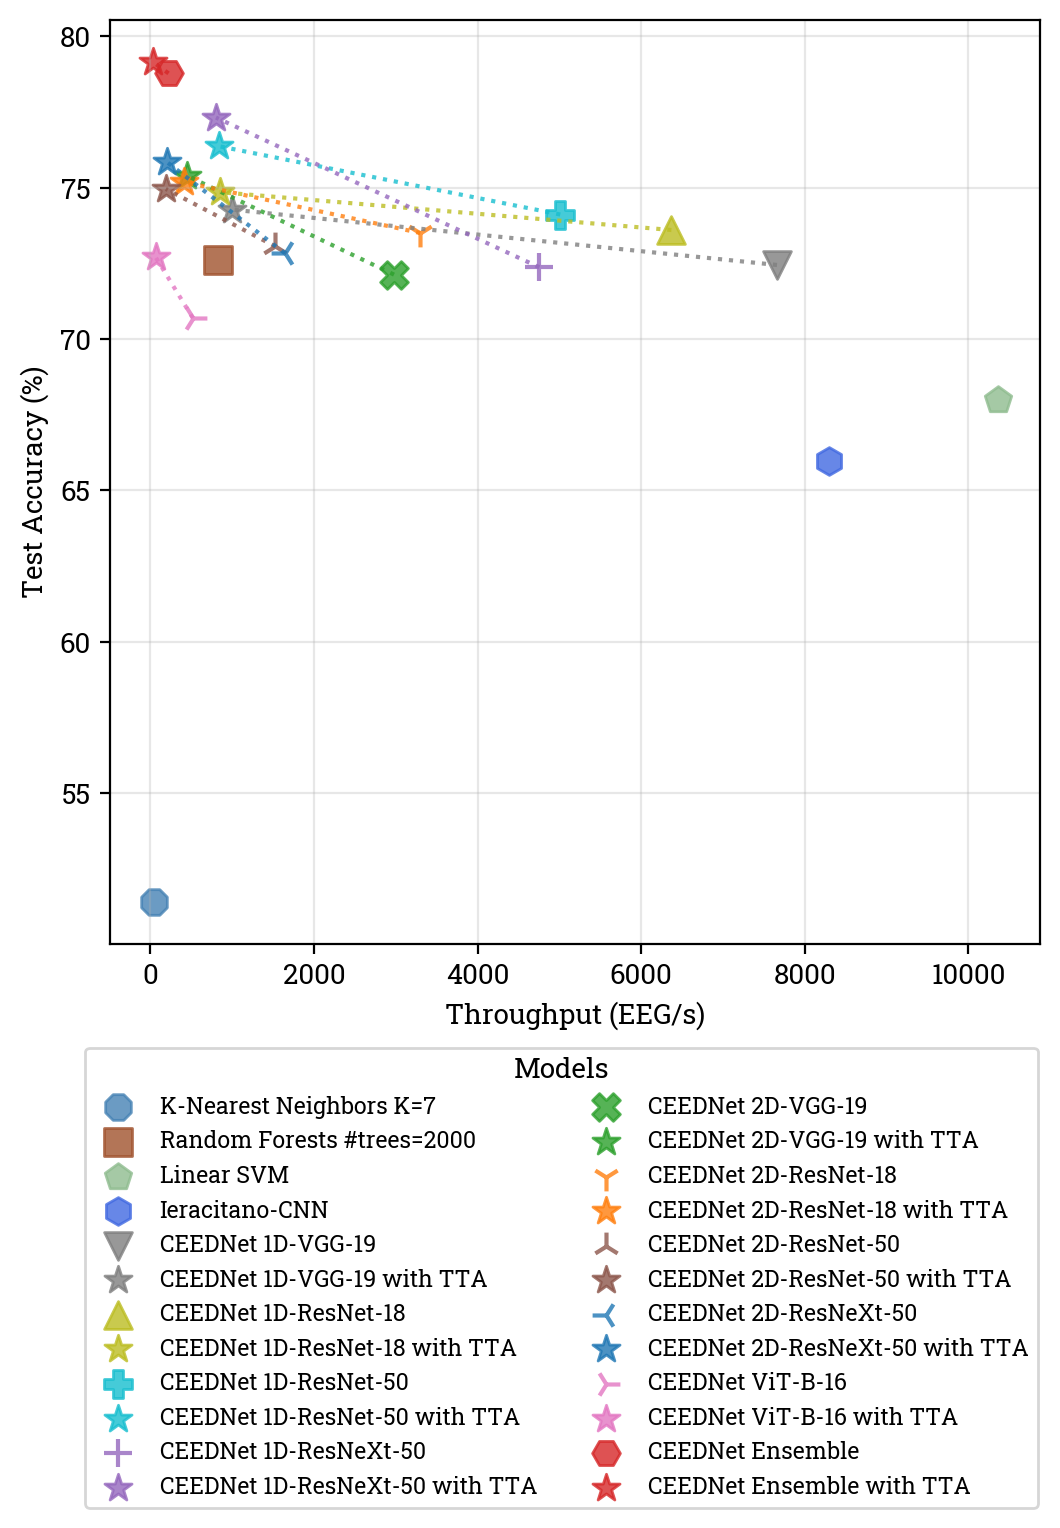

In [7]:
colors = ['steelblue', 'sienna', 'darkseagreen', 'royalblue',
          'tab:gray', 'tab:olive', 'tab:cyan', 'tab:purple', 'tab:green', 
          'tab:orange', 'tab:brown', 'tab:blue', 'tab:pink', 'tab:red']
markerstyles = ['8', 's', 'p', 'h', 'v', '^', 'P', '+', 'X', '1', '2', '3', '4', 'H', 'd']

with plt.style.context(['ieee', 'science', 'default']):  # science, ieee, default, fivethirtyeight
    plt.rcParams.update({'font.family': 'Roboto Slab'})
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.set_xlabel('Throughput (EEG/s)')
    ax.set_ylabel('Test Accuracy (%)')

    for i, (model, perf) in enumerate(performance.items()):
        if 'tta_acc' in perf.keys():
            ax.plot([perf['speed'], perf['tta_speed']], 
                    [perf['test_acc'], perf['tta_acc']], color=colors[i], ls=':', lw=1.5, alpha=0.8)
            
        ax.scatter(perf['speed'], perf['test_acc'], label=model, marker=markerstyles[i], s=100, color=colors[i], alpha=0.8)
        
        if 'tta_acc' in perf.keys():
            ax.scatter(perf['tta_speed'], perf['tta_acc'], label=model + ' with TTA', marker='*', s=105, color=colors[i], alpha=0.8)
        
    # ax.legend(title='Models', loc='lower center')
    # ax.legend(title='Models', bbox_to_anchor=(1.0, 1.0))
    ax.legend(title='Models', bbox_to_anchor=(1.01, -0.1), ncol=2, fontsize='small')
    ax.grid(alpha=0.3)
    # plt.xscale('log')
    ax.autoscale(axis='x')
    fig.savefig(os.path.join('local/output', f'exp-{task}-speed-acc-plot.pdf'), transparent=True, bbox_inches='tight')